### Problem Statement
1) Delivery_time -> Predict delivery time using sorting time ........
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### 1) Delivery_time -> Predict delivery time using sorting time

In [49]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [4]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time.shape

(21, 2)

In [5]:
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
X = delivery_time['Sorting Time']
y = delivery_time['Delivery Time']

#### Assumptions for Linear Regression

###### 1.check for linearity

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

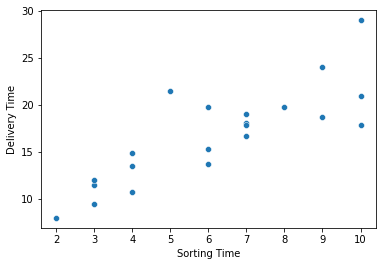

In [8]:
sns.scatterplot(X,y)

In [9]:
delivery_time.corr()                    # 83%

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


###### 2.Homoscedasticity

In [14]:
lm1 = sm.OLS(y,X).fit()
y_pred1 = lm1.predict(X)
residuals = y - y_pred1
mse1 = mean_squared_error(y, y_pred1)

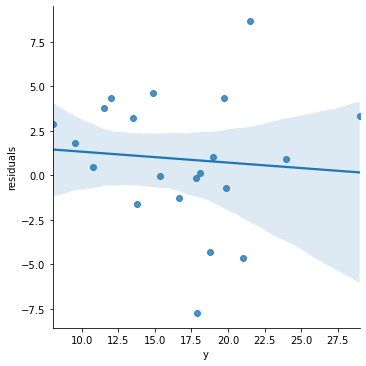

In [15]:
prediction = pd.DataFrame([])
prediction['y'] = y
prediction['residuals'] = residuals
sns.lmplot(x= 'y', y = 'residuals', data = prediction)
plt.show()

Above plot shows that the variance of residual term is relatively more for higher fitted values.

###### 3. Check for normality of error

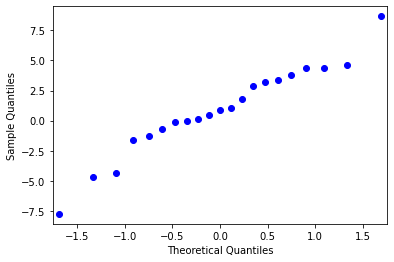

In [16]:
sm.qqplot(residuals)
plt.show()

plot is forming a line that is roughly straight,  we can assume there is some normality.

###### 4. Autocorrelation

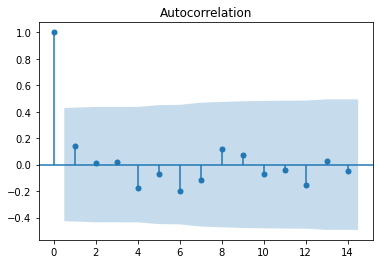

In [17]:
sm.graphics.tsa.plot_acf(residuals)
plt.show()

The results show some signs of autocorelation since there is spike outside the confidence interval region. could be due to outliers

### EDA

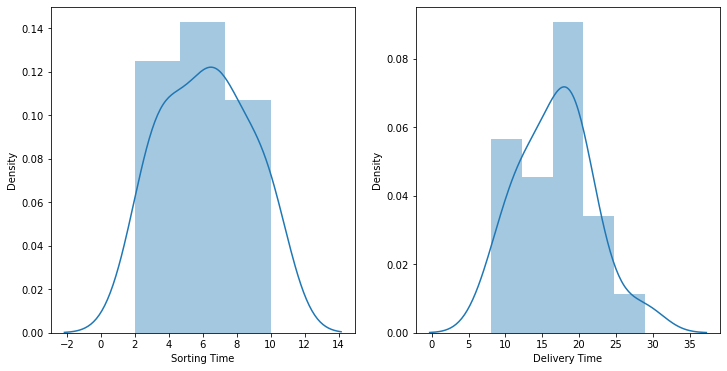

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(X)

plt.subplot(1,2,2)
sns.distplot(y)
plt.show()

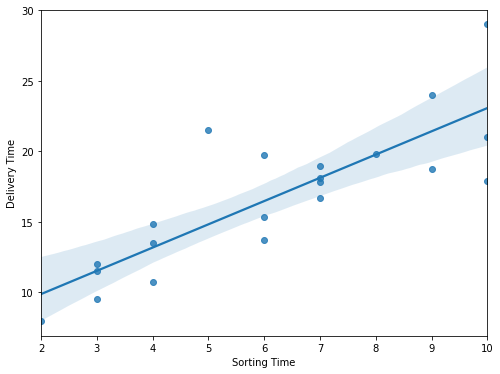

In [19]:
plt.figure(figsize = (8,6))
sns.regplot(X,y)
plt.show()

### Model Building

In [20]:
# no transformation
lm1 = sm.OLS(y,X).fit()
y_pred1 = lm1.predict(X)
mse1 = mean_squared_error(y, y_pred1)
mse1

13.789237779137352

In [21]:
# log transformation
X_log = np.log(delivery_time['Sorting Time'])
y_log = np.log(delivery_time['Delivery Time'])

lm2 = sm.OLS(y_log,X_log).fit()
y_pred2 = lm2.predict(X_log)
mse2 = mean_squared_error(y_log, y_pred2)
mse2

0.2199985025087825

In [22]:
# square root transformation
X_sqrt = np.sqrt(delivery_time['Sorting Time'])
y_sqrt = np.sqrt(delivery_time['Delivery Time'])

lm3 = sm.OLS(y_sqrt,X_sqrt).fit()
y_pred3 = lm3.predict(X_sqrt)
mse3 = mean_squared_error(y_sqrt, y_pred3)
mse3

0.21501014508246138

After transformation model is showring lower error.

In [23]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    2.10e-20
Time:                        18:48:43   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### coef is 1.6364, which means if the sorting time will increase by 1 unit the delivery time increase by 1.6364. R-squared (R2) 98.7% represents the variance for dependent variable that is explained by independent variable.

In [24]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [25]:
new_data = np.sqrt(new_data)
new_data

0    2.236068
1    2.828427
dtype: float64

In [26]:
prediction = lm3.predict(new_data)
prediction = prediction**2
prediction

0    13.388261
1    21.421218
dtype: float64

------------------------------------------------------------------------------------------------------------------------------

### 2) Salary_hike -> Build a prediction model for Salary_hike

In [27]:
sal_data = pd.read_csv('Salary_Data.csv')
sal_data.shape

(30, 2)

In [28]:
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [71]:
X = sal_data['YearsExperience']
y = sal_data['Salary']

#### Assumptions for Linear Regression

###### 1.check for linearity

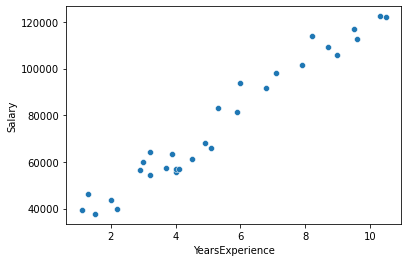

In [32]:
sns.scatterplot(X,y)
plt.show()

In [35]:
sal_data.corr()                    # 97.8%

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###### 2.Homoscedasticity

In [36]:
lm1 = sm.OLS(y,X).fit()
y_pred1 = lm1.predict(X)
residuals = y - y_pred1
mse1 = mean_squared_error(y, y_pred1)

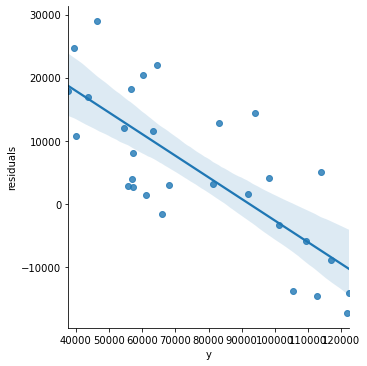

In [41]:
prediction = pd.DataFrame([])
prediction['y'] = y
prediction['residuals'] = residuals

sns.lmplot(x= 'y', y = 'residuals', data = prediction)
plt.show()

Above plot shows that the variance of residual term is almost equally ditributed.

###### 3. Check for normality of error

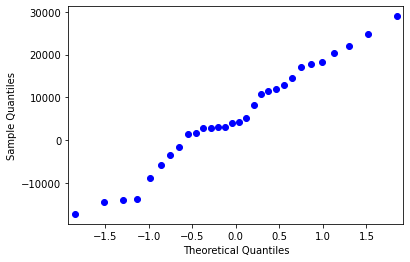

In [42]:
sm.qqplot(residuals)
plt.show()

plot is forming a line that is roughly straight,  we can assume there is some normality.

###### 4. Autocorrelation

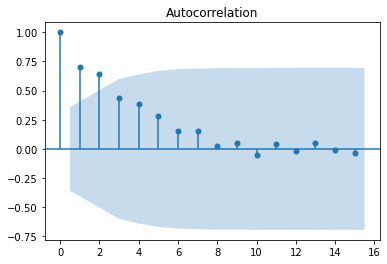

In [43]:
sm.graphics.tsa.plot_acf(residuals)
plt.show()

The results show some signs of autocorelation since there are few spikes outside the confidence interval region.

### EDA

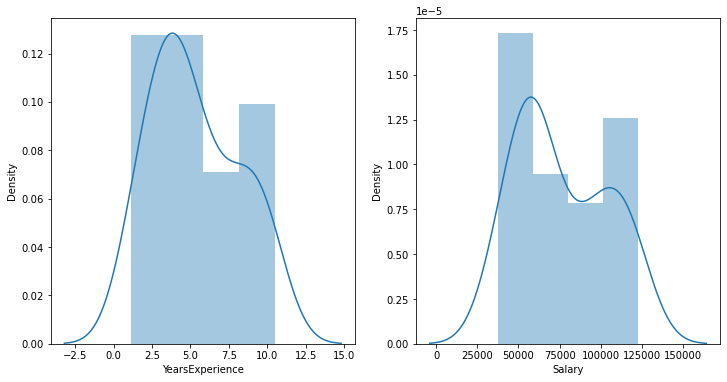

In [44]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(X)

plt.subplot(1,2,2)
sns.distplot(y)
plt.show()

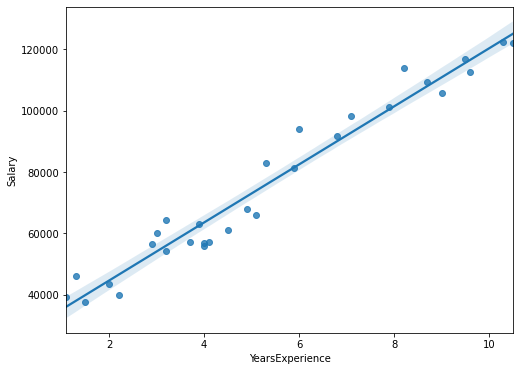

In [45]:
plt.figure(figsize = (8,6))
sns.regplot(X,y)
plt.show()

### Model Building

In [79]:
# no transformation
lm1 = sm.OLS(y,X).fit()
y_pred1 = lm1.predict(X)
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    2.56e-24
Time:                        22:13:48   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# log transformation
y_log = np.log(sal_data['Salary'])
X_log = np.log(sal_data['YearsExperience'])

lm2 = sm.OLS(y_log,X_log).fit()
y_pred2 = lm2.predict(X_log)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    8.60e-15
Time:                        22:14:02   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# square root transformation
y_sqrt = np.sqrt(sal_data['Salary'])
X_sqrt = np.sqrt(sal_data['YearsExperience'])

lm3 = sm.OLS(y_sqrt,X_sqrt).fit()
y_pred3 = lm3.predict(X_sqrt)
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                    2.81e-29
Time:                        22:15:04   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### lm3 model is showing best adjusted R2 value. Coef is 118.8652, which means if the Years of experience will increase by 1 unit the salary will increase by 118.8652,. R-squared (R2) 98.7% represents the variance for dependent variable that is explained by independent variable.

In [82]:
new_data=pd.Series([3.2,4.5, 6])
new_data

0    3.2
1    4.5
2    6.0
dtype: float64

In [83]:
new_data = np.sqrt(new_data)
new_data

0    1.788854
1    2.121320
2    2.449490
dtype: float64

In [84]:
prediction = lm3.predict(new_data)
prediction = prediction**2
prediction

0    45212.617999
1    63580.244061
2    84773.658747
dtype: float64

------------------------------------------------------------------------------------------------------------------------------